In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1.0,1,1,1,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0
1,1,NaN,2,0,0,0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,7
2,2,NaN,1,0,0,0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,7
3,2,2.0,2,1,0,0,2,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2,0.0,7
4,2,NaN,1,0,0,0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2.0,0,2,1,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,70
354,2,3.0,2,0,0,0,0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,70
355,2,2.0,2,1,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,70
356,2,1.0,0,3,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	35
int64		column 3	0
int64		column 4	0
int64		column 5	0
int64		column 6	0
int64		column 7	0
float64		column 8	141
float64		column 9	141
float64		column 10	141
int64		column 11	0
float64		column 12	141
int64		column 13	0
int64		column 14	0
int64		column 15	0
float64		column 16	141
int64		column 17	0
int64		column 18	0
float64		column 19	106
float64		column 20	35
float64		column 21	141
float64		column 22	106
float64		column 23	70
float64		column 24	141
float64		column 25	141
float64		column 26	106
float64		column 27	141
float64		column 28	106
float64		column 29	141
float64		column 30	141
float64		column 31	141
int64		column 32	0
float64		column 33	141
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,323.000000,358.000000,358.000000,358.000000,358.000000,358.000000,217.000000,217.000000,217.000000,...,217.000000,252.000000,217.000000,252.000000,217.000000,217.000000,217.000000,358.000000,217.000000,358.000000
mean,2.078212,1.817337,1.569832,1.354749,0.636872,0.449721,0.170391,0.419355,0.585253,0.525346,...,0.451613,0.468254,0.520737,0.952381,0.520737,0.055300,0.050691,1.877095,0.626728,36.296089
std,0.664865,0.700982,0.900909,1.135062,0.908709,0.956468,0.576394,0.862916,0.973427,0.933211,...,0.891685,0.871748,1.004980,1.131632,1.004980,0.355749,0.322335,0.699324,1.152222,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

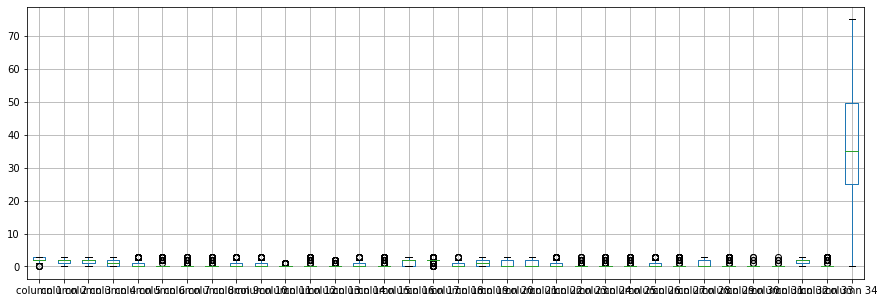

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.817337
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.449721
column 7      0.170391
column 8      0.419355
column 9      0.585253
column 10     0.525346
column 11     0.122905
column 12     0.470046
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.396313
column 17     1.955307
column 18     0.511173
column 19     1.281746
column 20     0.690402
column 21     0.958525
column 22     0.634921
column 23     0.305556
column 24     0.368664
column 25     0.451613
column 26     0.468254
column 27     0.520737
column 28     0.952381
column 29     0.520737
column 30     0.055300
column 31     0.050691
column 32     1.877095
column 33     0.626728
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.407474,0.248062,-0.033157,-0.008496,0.028225,-0.115275,0.026920,0.103420,0.103261,...,0.028055,0.122329,0.041498,0.068742,0.027718,0.053099,0.039399,0.093026,0.039574,-0.005028
column 2,0.407474,1.000000,0.323545,-0.061408,-0.034277,-0.087611,-0.059262,-0.000954,0.336570,0.312122,...,-0.012006,0.200771,-0.035351,0.061653,-0.054402,0.044642,0.045164,-0.000175,-0.065343,-0.026310
column 3,0.248062,0.323545,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.268837,0.328612,0.288992,...,0.274804,0.325692,0.292313,-0.211795,0.261336,0.019156,-0.000742,0.124812,0.260666,0.138493
column 4,-0.033157,-0.061408,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.382286,-0.285935,-0.177037,...,0.399465,-0.215838,0.372856,-0.016227,0.385032,-0.141822,-0.139261,0.051553,0.408852,0.048053
column 5,-0.008496,-0.034277,0.239778,0.280039,1.000000,0.388233,-0.175676,0.350870,-0.073152,-0.017722,...,0.394813,-0.027380,0.366985,0.008264,0.376729,-0.116446,-0.117807,0.110295,0.353163,0.081162
column 6,0.028225,-0.087611,0.322657,0.412525,0.388233,1.000000,-0.139384,0.885416,-0.283284,-0.281882,...,0.920387,-0.153571,0.927003,0.067119,0.927003,-0.080550,-0.081491,0.258753,0.916090,0.096953
column 7,-0.115275,-0.059262,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.098550,0.164524,0.075981,...,-0.102707,-0.119921,-0.105076,-0.012328,-0.105076,0.752273,0.754514,-0.093833,-0.099303,-0.371368
column 8,0.026920,-0.000954,0.268837,0.382286,0.350870,0.885416,-0.098550,1.000000,-0.293535,-0.274843,...,0.865839,-0.158933,0.873450,0.122657,0.862773,-0.075892,-0.076779,0.250083,0.865923,0.115197
column 9,0.103420,0.336570,0.328612,-0.285935,-0.073152,-0.283284,0.164524,-0.293535,1.000000,0.704735,...,-0.273913,0.553740,-0.284579,-0.424025,-0.284579,0.120013,0.141089,-0.020619,-0.295520,-0.039702
column 10,0.103261,0.312122,0.288992,-0.177037,-0.017722,-0.281882,0.075981,-0.274843,0.704735,1.000000,...,-0.275308,0.523990,-0.273298,-0.418912,-0.283171,-0.032132,-0.027377,0.074535,-0.281786,-0.000485


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+89,34+89+89,34+89+89+89,34+89+89+89+89,34+89+89+89+89+89,34+89+89+89+89+89+89,34+89+89+89+89+89+89+89,34+89+89+89+89+89+89,34+89+89+89+89+89,34+89+89+89+89,34+89+89+89,34+89+89,34+89,34], vae_layer = False, seed = 89)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 69.27627355402166
Epoch: 1 , loss: 69.61217637495561
Epoch: 2 , loss: 69.16327008334073
Epoch: 3 , loss: 68.65312576293945
Epoch: 4 , loss: 66.45663486827503
Epoch: 5 , loss: 65.30853618275036
Epoch: 6 , loss: 64.27512168884277
Epoch: 7 , loss: 63.70268995111639
Epoch: 8 , loss: 63.15044038945978
Epoch: 9 , loss: 63.1462551463734
Epoch: 10 , loss: 62.336603511463515
Epoch: 11 , loss: 61.940587130459875
Epoch: 12 , loss: 61.70731457796964
Epoch: 13 , loss: 60.946772141890094
Epoch: 14 , loss: 60.96548080444336
Epoch: 15 , loss: 60.66887647455389
Epoch: 16 , loss: 60.18933937766335
Epoch: 17 , loss: 60.38773935491388
Epoch: 18 , loss: 59.81561123241078
Epoch: 19 , loss: 59.4081223227761
Epoch: 20 , loss: 58.896575060757726
Epoch: 21 , loss: 59.13129286332564
Epoch: 22 , loss: 59.06079708446156
Epoch: 23 , loss: 58.70257776433771
Epoch: 24 , loss: 58.29430649497292
Epoch: 25 , loss: 57.13472401012074
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.367529
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.524585
column 9      0.102829
column 10    -0.010053
column 11     0.000000
column 12     0.496355
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.311439
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.371330
column 22     0.164981
column 23     0.000000
column 24     0.169385
column 25     0.606017
column 26     0.224677
column 27     0.657553
column 28     0.875836
column 29     0.531591
column 30     0.024534
column 31     0.059461
column 32     1.000000
column 33     0.833057
column 34    12.000000
Name: 21, dtype: float64

In [21]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [22]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0.000000,0,0,0,0,0,0.359925,-1.717451,-1.755860,...,0.397005,0.100705,0.349195,0.000000,0.314346,0.008340,-0.003148,0,-1.569388,0
1,0,0.245584,0,0,0,0,0,0.265021,-2.797711,0.133650,...,0.338311,0.111453,0.370814,0.644641,0.332271,-1.984526,-1.995976,0,0.505469,0
2,0,-0.868831,0,0,0,0,0,0.484690,-1.974699,-0.044431,...,0.516479,0.179983,0.550960,-1.325883,0.436464,-2.979835,-2.980966,0,0.707856,0
3,0,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
4,0,-1.111687,0,0,0,0,0,0.328362,-1.843665,0.141451,...,0.440329,0.092840,0.443120,-2.547288,0.383322,-1.976502,-1.959877,0,0.535698,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0.000000,0,0,0,0,0,0.960433,0.432802,0.393101,...,1.082765,0.345966,1.358326,-1.642589,1.160038,0.077808,0.085005,0,1.659256,0
354,0,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
355,0,0.000000,0,0,0,0,0,0.651001,0.493903,0.366082,...,0.823001,0.306396,0.999978,0.000000,0.846142,0.070054,0.081383,0,1.215336,0
356,0,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0


Calculating NRMSE Value

In [23]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [24]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [25]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(46.27858240473561, 758.0725558942231)

In [26]:
NRMS=numerator/denominator
NRMS


0.06104769529632338

In [27]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [28]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1.000000,1,1,1,0,0,0.359925,0.282549,0.244140,...,0.397005,0.100705,0.349195,0.000000,0.314346,0.008340,-0.003148,0,0.430612,0
1,1,1.245584,2,0,0,0,3,0.265021,0.202289,0.133650,...,0.338311,0.111453,0.370814,0.644641,0.332271,0.015474,0.004024,2,0.505469,7
2,2,1.131169,1,0,0,0,3,0.484690,0.025301,-0.044431,...,0.516479,0.179983,0.550960,0.674117,0.436464,0.020165,0.019034,2,0.707856,7
3,2,2.000000,2,1,0,0,2,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2,0.000000,7
4,2,0.888313,1,0,0,0,2,0.328362,0.156335,0.141451,...,0.440329,0.092840,0.443120,0.452712,0.383322,0.023498,0.040123,2,0.535698,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2.000000,0,2,1,0,0,0.960433,0.432802,0.393101,...,1.082765,0.345966,1.358326,1.357411,1.160038,0.077808,0.085005,3,1.659256,70
354,2,3.000000,2,0,0,0,0,0.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,70
355,2,2.000000,2,1,0,0,0,0.651001,0.493903,0.366082,...,0.823001,0.306396,0.999978,2.000000,0.846142,0.070054,0.081383,2,1.215336,70
356,2,1.000000,0,3,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,70


In [29]:
imputations[-1].to_excel("DERM_AE_20(imp).xlsx", index=False, header=False)